In [2]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [12]:
df = data.iloc[:,0:11]
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


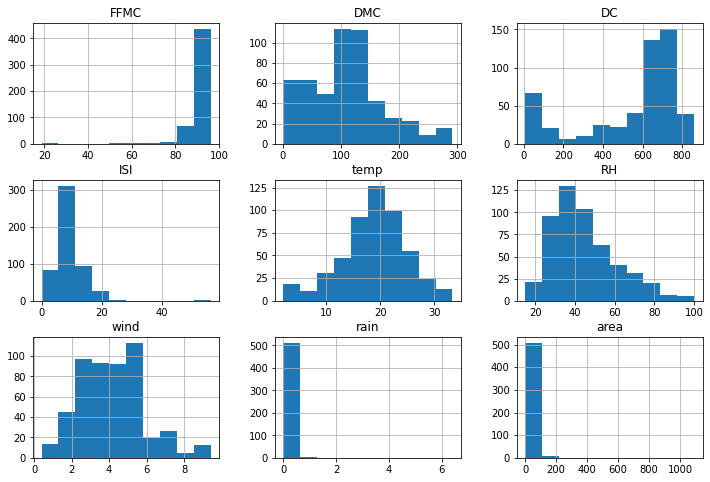

In [15]:
# Univariate Histograms
from matplotlib import pyplot
from pandas import read_csv

df.hist(figsize=(12, 8))
pyplot.show()

In [97]:
data1=data.drop(['month', 'day','area'], axis=1)

In [91]:
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,28,37,41,29,12,34,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,56,49,144,42,85,16,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,56,56,156,42,55,16,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,67,48,33,64,13,72,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,46,66,46,68,30,73,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,9,71,141,7,172,15,5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,9,71,141,7,123,54,12,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,9,71,141,7,116,53,14,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,92,168,122,80,156,25,8,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [37]:
data1['size_category'].unique()

array(['small', 'large'], dtype=object)

In [65]:
data1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
import seaborn as sns

In [66]:
print("Shape:", data1.shape)

Shape: (517, 28)


In [68]:
from sklearn.preprocessing import LabelEncoder
data1 = data1.apply(LabelEncoder().fit_transform)
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,28,37,41,29,12,34,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,56,49,144,42,85,16,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,56,56,156,42,55,16,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,67,48,33,64,13,72,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,46,66,46,68,30,73,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [69]:
X = data1.drop(['size_category'], axis=1)

y = data1['size_category']

In [70]:

#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 5)
fit = rfe.fit(X, y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Number of Features:  5
Selected Features:  [False False  True  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False]
Feature Ranking:  [ 2  3  1  1  1  1  1 20  7 10 12  5  6  8  9 21 11  4 17 22 14 16 15 18
 23 19 13]


In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X, y)
print(model.feature_importances_)

[0.05496997 0.06967208 0.09048061 0.12570946 0.16910995 0.17317724
 0.13940872 0.         0.01894397 0.01503617 0.01825698 0.0251424
 0.         0.03344035 0.01775383 0.         0.         0.03727674
 0.         0.         0.00109265 0.         0.         0.00898904
 0.         0.00153982 0.        ]


'Wind', 'RH' and DMC,FFMC,DC,Rain were top 5 selected features/feature combination for predicting 'size_category' using Recursive Feature Elimination.

In [73]:
col = list(X.columns)[5:]
X.drop(col, axis=1, inplace=True)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((361, 7), (156, 7), (361,), (156,))

In [75]:
y_train

390    0
5      1
141    1
268    1
135    1
      ..
70     1
277    0
9      1
359    0
192    0
Name: size_category, Length: 361, dtype: int64

In [76]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
gsv.best_params_ , gsv.best_score_ 

({'C': 0.1, 'gamma': 50, 'kernel': 'rbf'}, 0.7424174174174174)

In [78]:
clf = SVC(C= 0.1, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 70.51282051282051


array([[  0,  46],
       [  0, 110]])

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.71      1.00      0.83       110

    accuracy                           0.71       156
   macro avg       0.35      0.50      0.41       156
weighted avg       0.50      0.71      0.58       156



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=5000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('GradientBoost',GradientBoostingClassifier()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('Bagging',BaggingClassifier()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('ExtraTrees',ExtraTreesClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y,   cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.730769 (0.211786)
KNN: 0.626357 (0.157995)
CART: 0.544947 (0.115393)
NB: 0.724962 (0.208368)
SVM: 0.730769 (0.211786)
MLP: 0.651659 (0.162915)
GradientBoost: 0.666817 (0.186890)
AdaBoost: 0.687971 (0.189646)
Bagging: 0.593741 (0.109547)
RandomForest: 0.624548 (0.123279)
ExtraTrees: 0.603130 (0.127193)


# after comparimng all method LogisticRegression and SVM is best method for this data set.